# <center> 1. Dataframe: Dry Beans </center>

## 1.1. IMPORTES DE LIBRERÍAS BÁSICAS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## 1.2. LECTURA DE LA DATA

In [5]:
dryBeans = pd.read_excel("./Dry_Bean_Dataset.xlsx")
dryBeans = dryBeans.rename(columns={
	"Area"              :"AREA"                 ,
	"Perimeter"         :"PERIMETER"            ,
	"MajorAxisLength"   :"LONG_DEL_EJE_MAYOR"   ,
	"MinorAxisLength"   :"LONG_DEL_EJE_MENOR"   ,
	"AspectRation"      :"RELACION_DE_ASPECTO"  ,
	"Eccentricity"      :"EXCENTRICIDAD"        ,
	"ConvexArea"        :"AREA_CONVEXA"         ,
    "EquivDiameter"     :"DIAMETRO_EQUIV"       ,
    "Extent"            :"MEDIDA"               ,
    "Solidity"          :"SOLIDEZ"              ,
    "roundness"         :"REDONDEZ"             ,
    "Compactness"       :"COMPACIDAD"           ,
    "ShapeFactor1"      :"FACTOR_DE_FORMA_1"    ,
    "ShapeFactor2"      :"FACTOR_DE_FORMA_2"    ,
    "ShapeFactor3"      :"FACTOR_DE_FORMA_3"    ,
    "ShapeFactor4"      :"FACTOR_DE_FORMA_4"    ,
    "Class"             :"CLASE"
})

# <center> 2. Análisis de la data </center>

## 2.1. Análisis general

In [6]:
# Hay desviaciones estándar mayores a 3, pero con las posterior normalización veremos las diferencias
dryBeans.describe()

,AREA,PERIMETER,LONG_DEL_EJE_MAYOR,LONG_DEL_EJE_MENOR,RELACION_DE_ASPECTO,EXCENTRICIDAD,AREA_CONVEXA,DIAMETRO_EQUIV,MEDIDA,SOLIDEZ,REDONDEZ,COMPACIDAD,FACTOR_DE_FORMA_1,FACTOR_DE_FORMA_2,FACTOR_DE_FORMA_3,FACTOR_DE_FORMA_4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [18]:
# No hay celdas vacías
dryBeans.isna().count()

AREA                   13611
PERIMETER              13611
LONG_DEL_EJE_MAYOR     13611
LONG_DEL_EJE_MENOR     13611
RELACION_DE_ASPECTO    13611
EXCENTRICIDAD          13611
AREA_CONVEXA           13611
DIAMETRO_EQUIV         13611
MEDIDA                 13611
SOLIDEZ                13611
REDONDEZ               13611
COMPACIDAD             13611
FACTOR_DE_FORMA_1      13611
FACTOR_DE_FORMA_2      13611
FACTOR_DE_FORMA_3      13611
FACTOR_DE_FORMA_4      13611
CLASE                  13611
dtype: int64

In [19]:
# Plot the dataframe
sns.pairplot(dryBeans)

## 2.2. Análisis por clase

### 2.2.1. SEKER

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


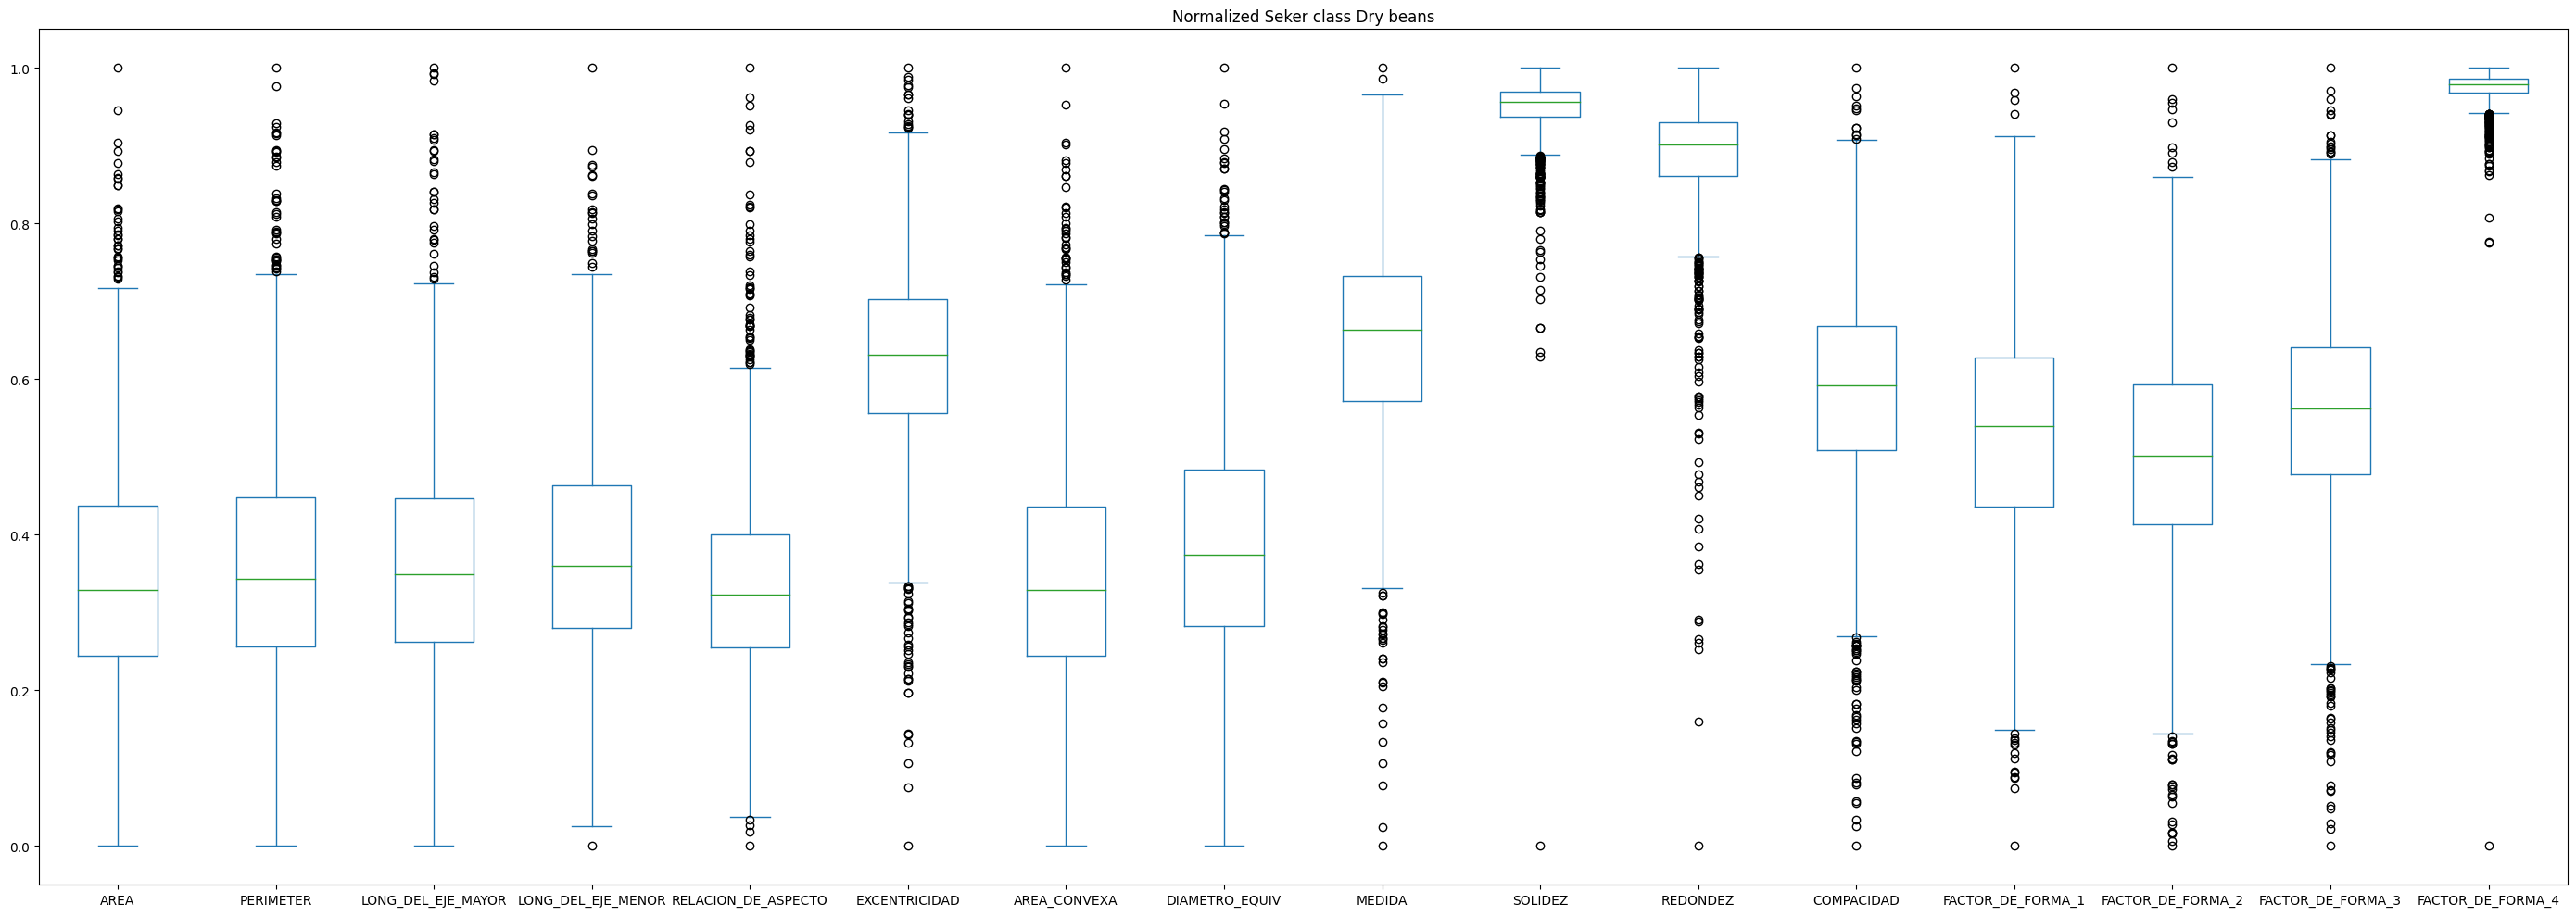

In [ ]:
dryBeans_SEKER = dryBeans[dryBeans['CLASE'] == 'SEKER']

dryBeans_SEKER_norm = dryBeans_SEKER.copy()
dryBeans_SEKER_norm = dryBeans_SEKER_norm[dryBeans_SEKER_norm.columns[0:16]]
dryBeans_SEKER_norm = (dryBeans_SEKER_norm - dryBeans_SEKER_norm.min()) / (dryBeans_SEKER_norm.max() - dryBeans_SEKER_norm.min())

# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_SEKER_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='Normalized Seker class Dry beans')

# Display the plot
plt.show()

### 2.2.2. BARBUNYA

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


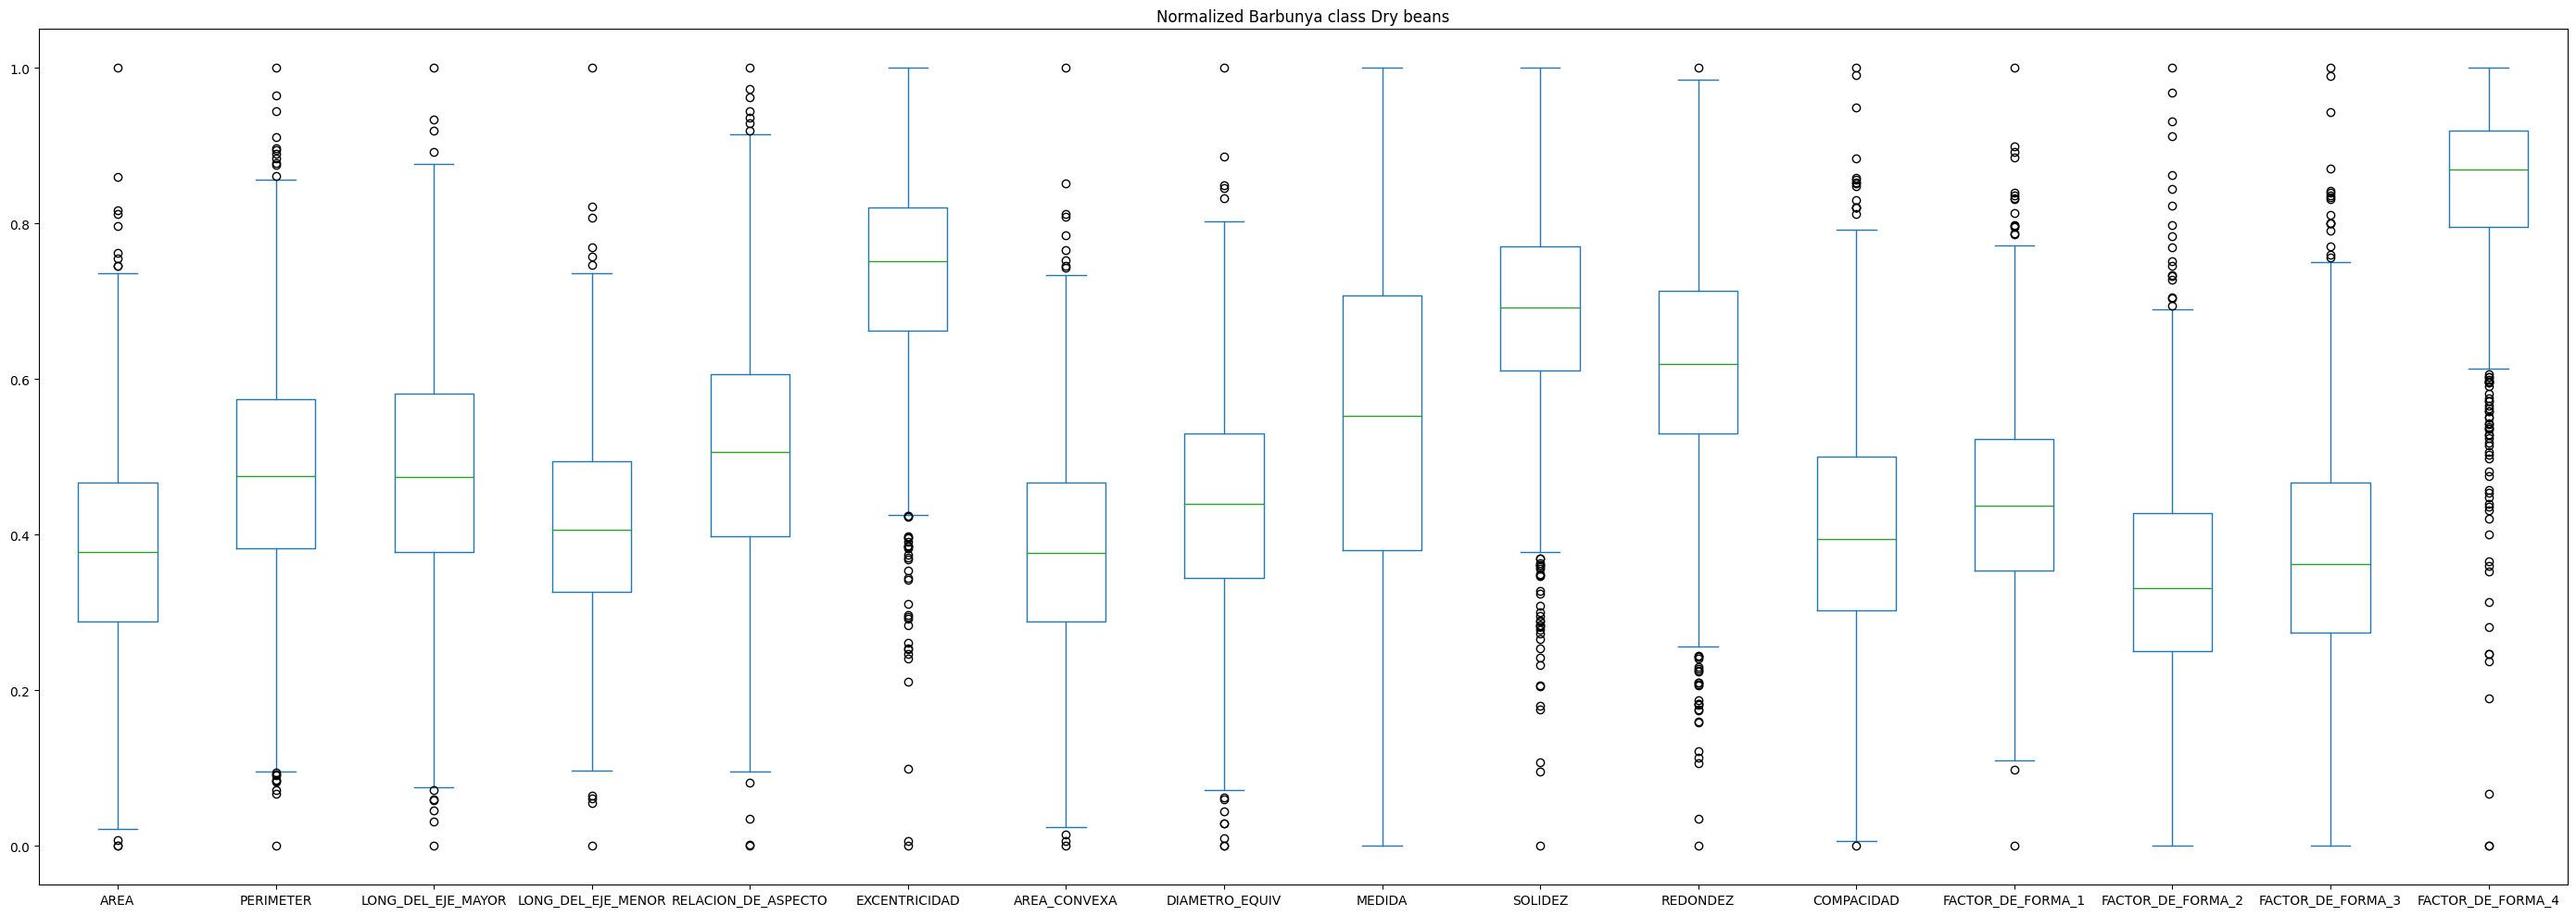

In [ ]:
dryBeans_BARBUNYA = dryBeans[dryBeans['CLASE'] == 'BARBUNYA']

dryBeans_BARBUNYA_norm = dryBeans_BARBUNYA.copy()
dryBeans_BARBUNYA_norm = dryBeans_BARBUNYA_norm[dryBeans_BARBUNYA_norm.columns[0:16]]
dryBeans_BARBUNYA_norm = (dryBeans_BARBUNYA_norm - dryBeans_BARBUNYA_norm.min()) / (dryBeans_BARBUNYA_norm.max() - dryBeans_BARBUNYA_norm.min())

# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_BARBUNYA_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='Normalized Barbunya class Dry beans')

# Display the plot
plt.show()

### 2.2.3. BOMBAY

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


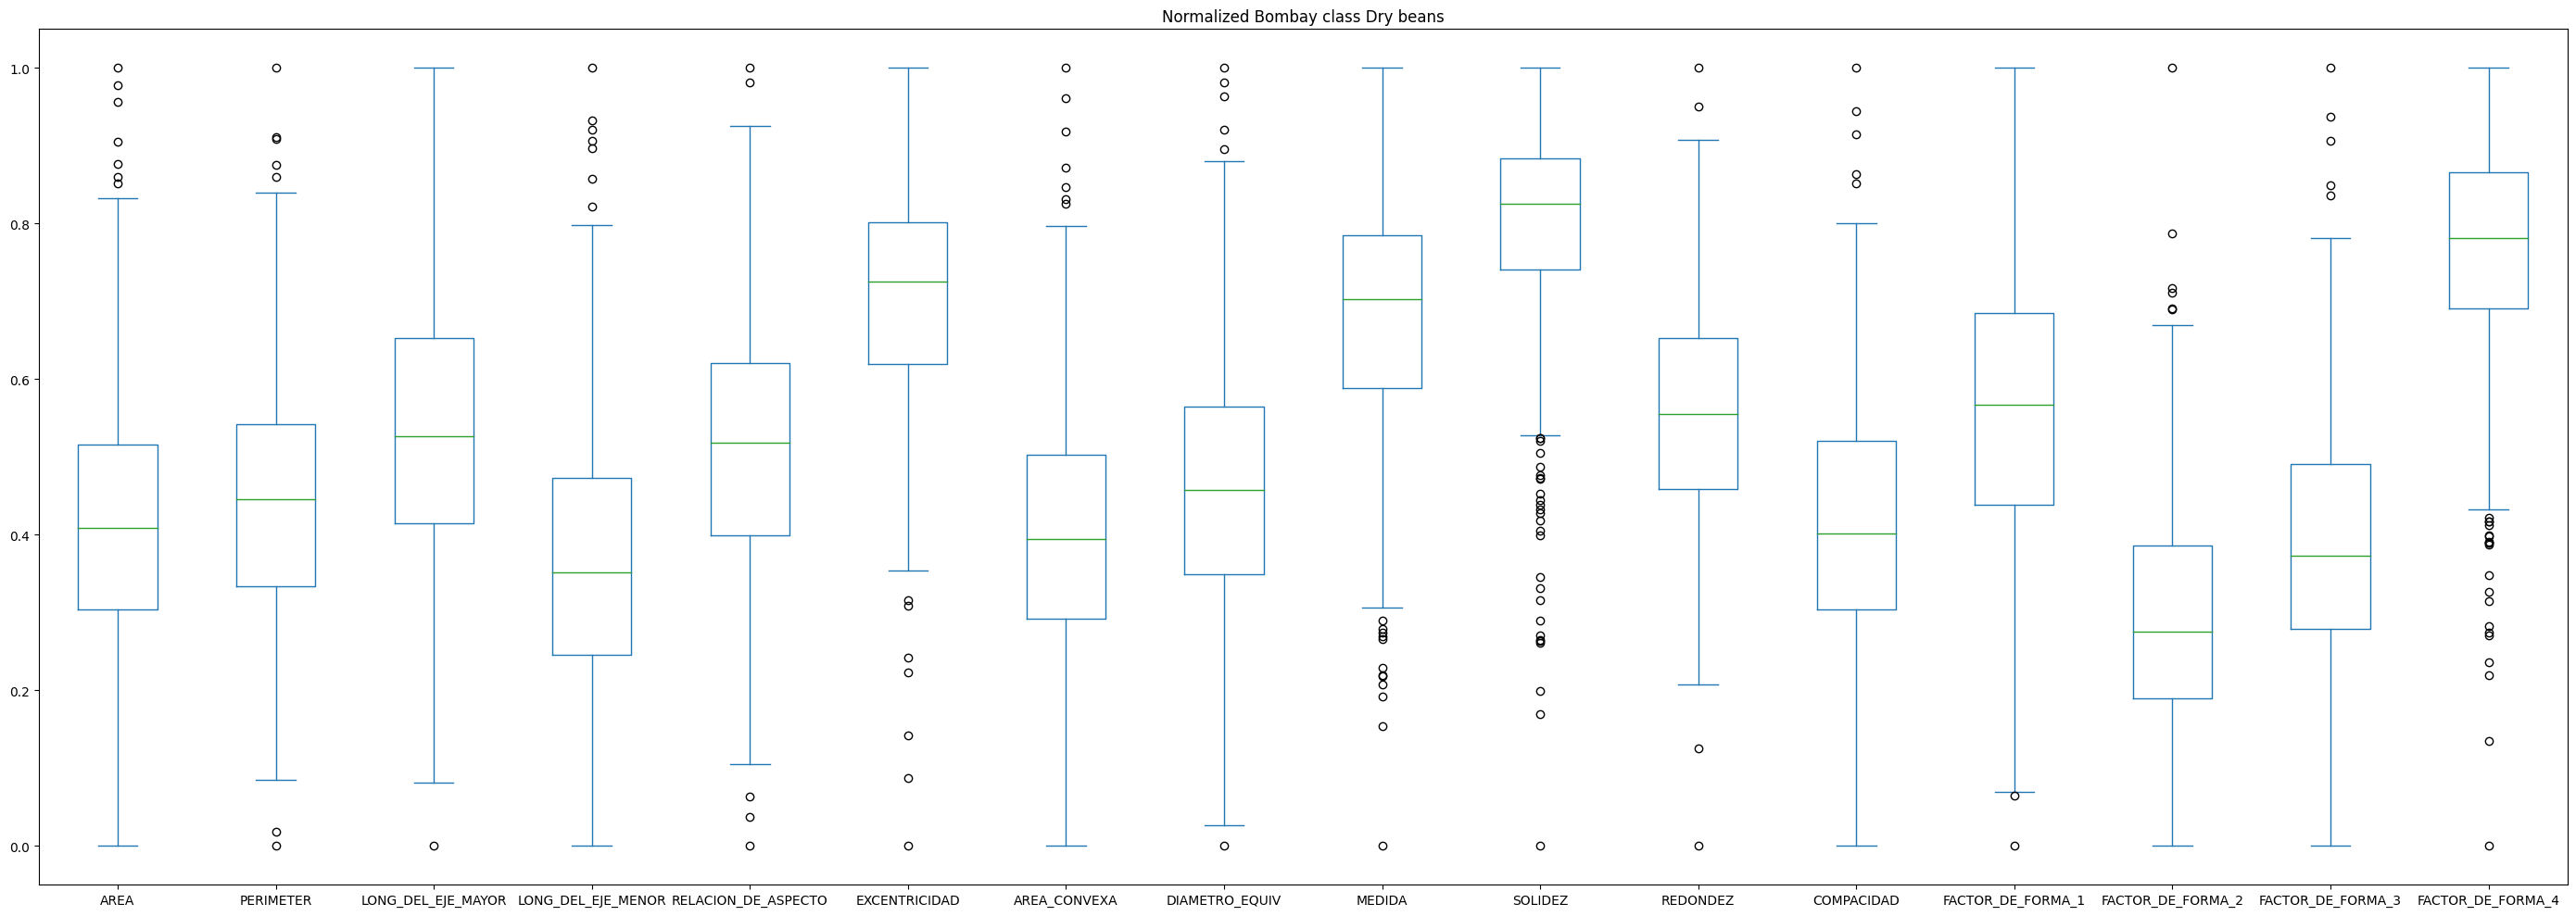

In [ ]:
dryBeans_BOMBAY = dryBeans[dryBeans['CLASE'] == 'BOMBAY']

dryBeans_BOMBAY_norm = dryBeans_BOMBAY.copy()
dryBeans_BOMBAY_norm = dryBeans_BOMBAY_norm[dryBeans_BOMBAY_norm.columns[0:16]]
dryBeans_BOMBAY_norm = (dryBeans_BOMBAY_norm - dryBeans_BOMBAY_norm.min()) / (dryBeans_BOMBAY_norm.max() - dryBeans_BOMBAY_norm.min())

# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_BOMBAY_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='Normalized Bombay class Dry beans')

# Display the plot
plt.show()

### 2.2.4. CALI

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


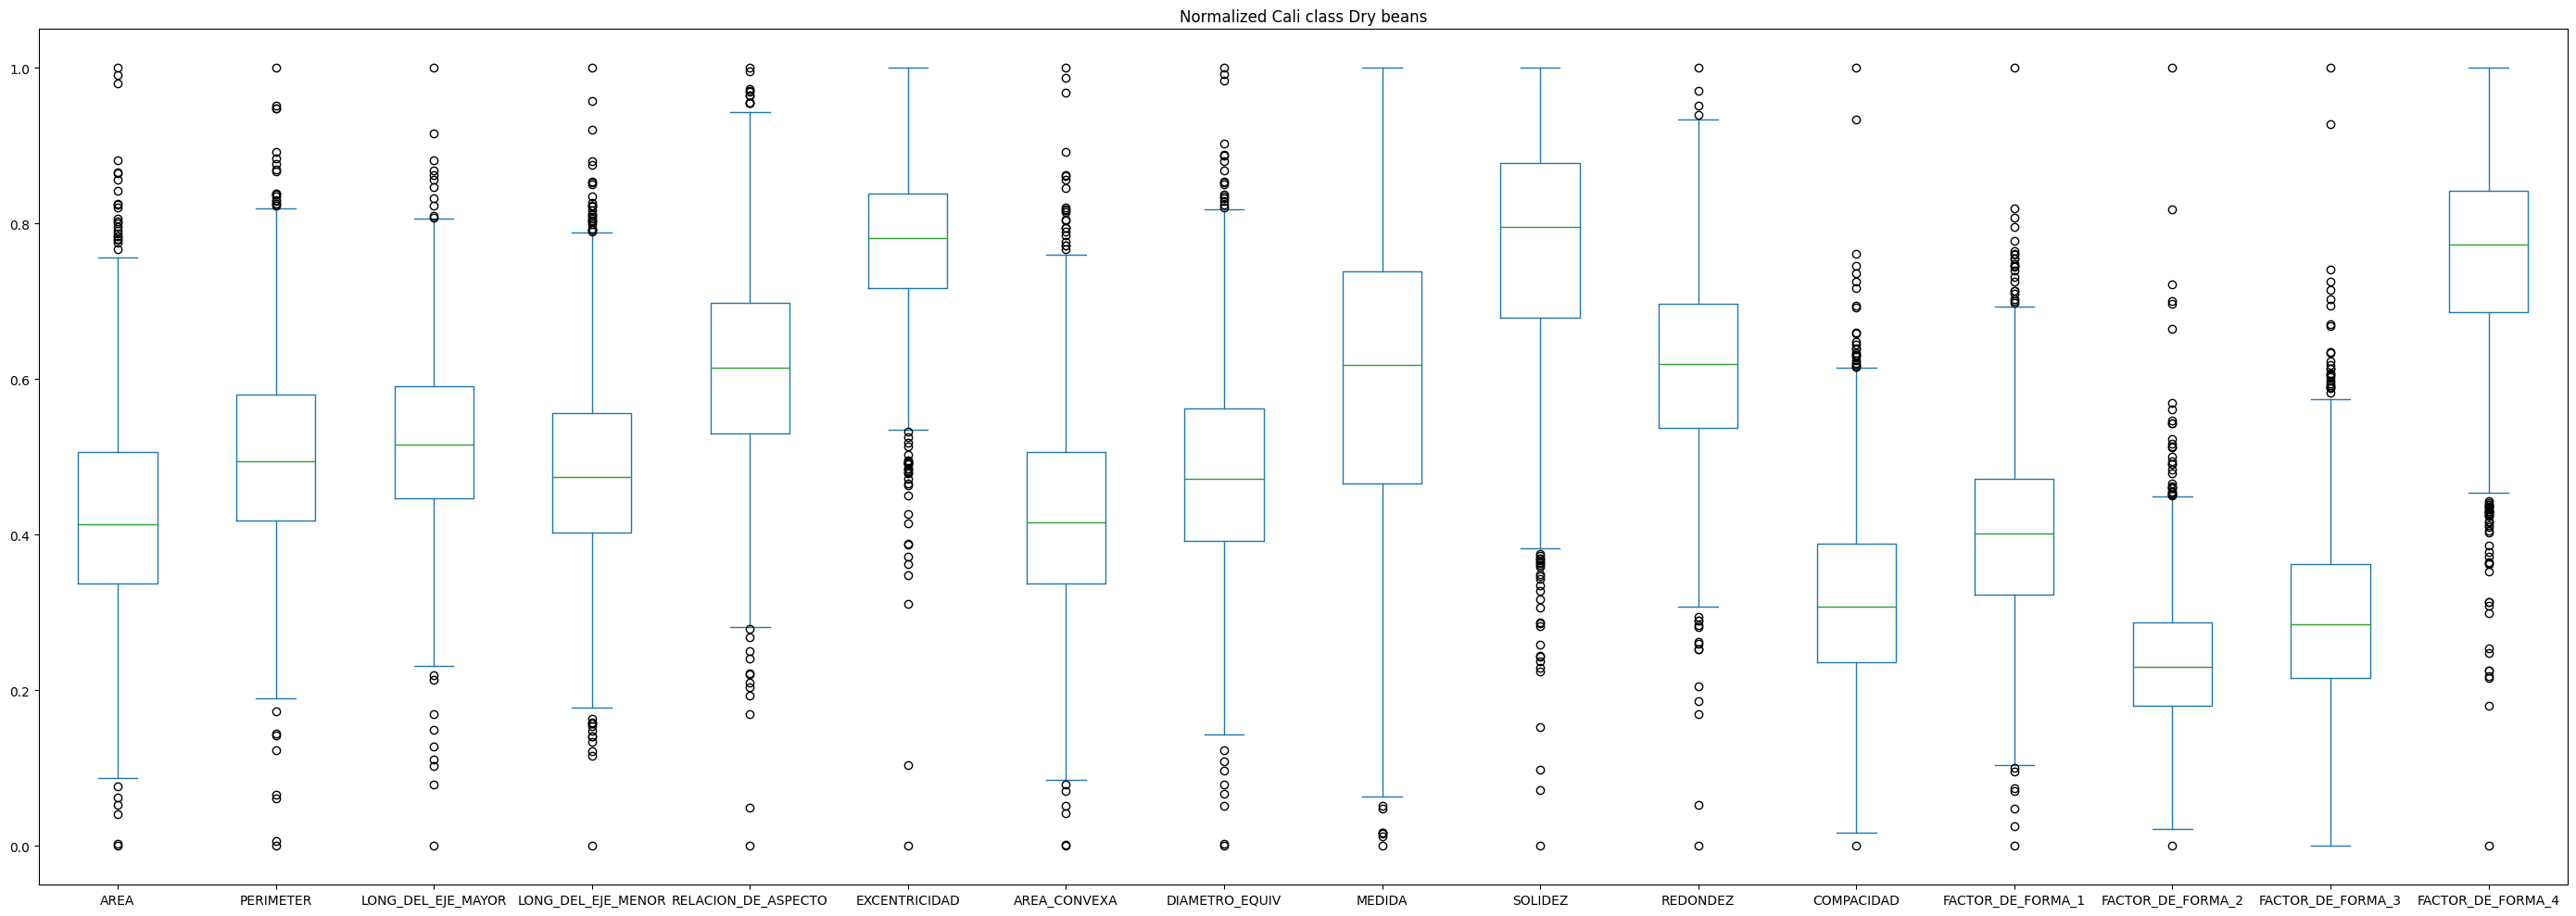

In [ ]:
dryBeans_CALI = dryBeans[dryBeans['CLASE'] == 'CALI']

dryBeans_CALI_norm = dryBeans_CALI.copy()
dryBeans_CALI_norm = dryBeans_CALI_norm[dryBeans_CALI_norm.columns[0:16]]
dryBeans_CALI_norm = (dryBeans_CALI_norm - dryBeans_CALI_norm.min()) / (dryBeans_CALI_norm.max() - dryBeans_CALI_norm.min())

# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_CALI_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='Normalized Cali class Dry beans')

# Display the plot
plt.show()

### 2.2.5. DERMASON

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


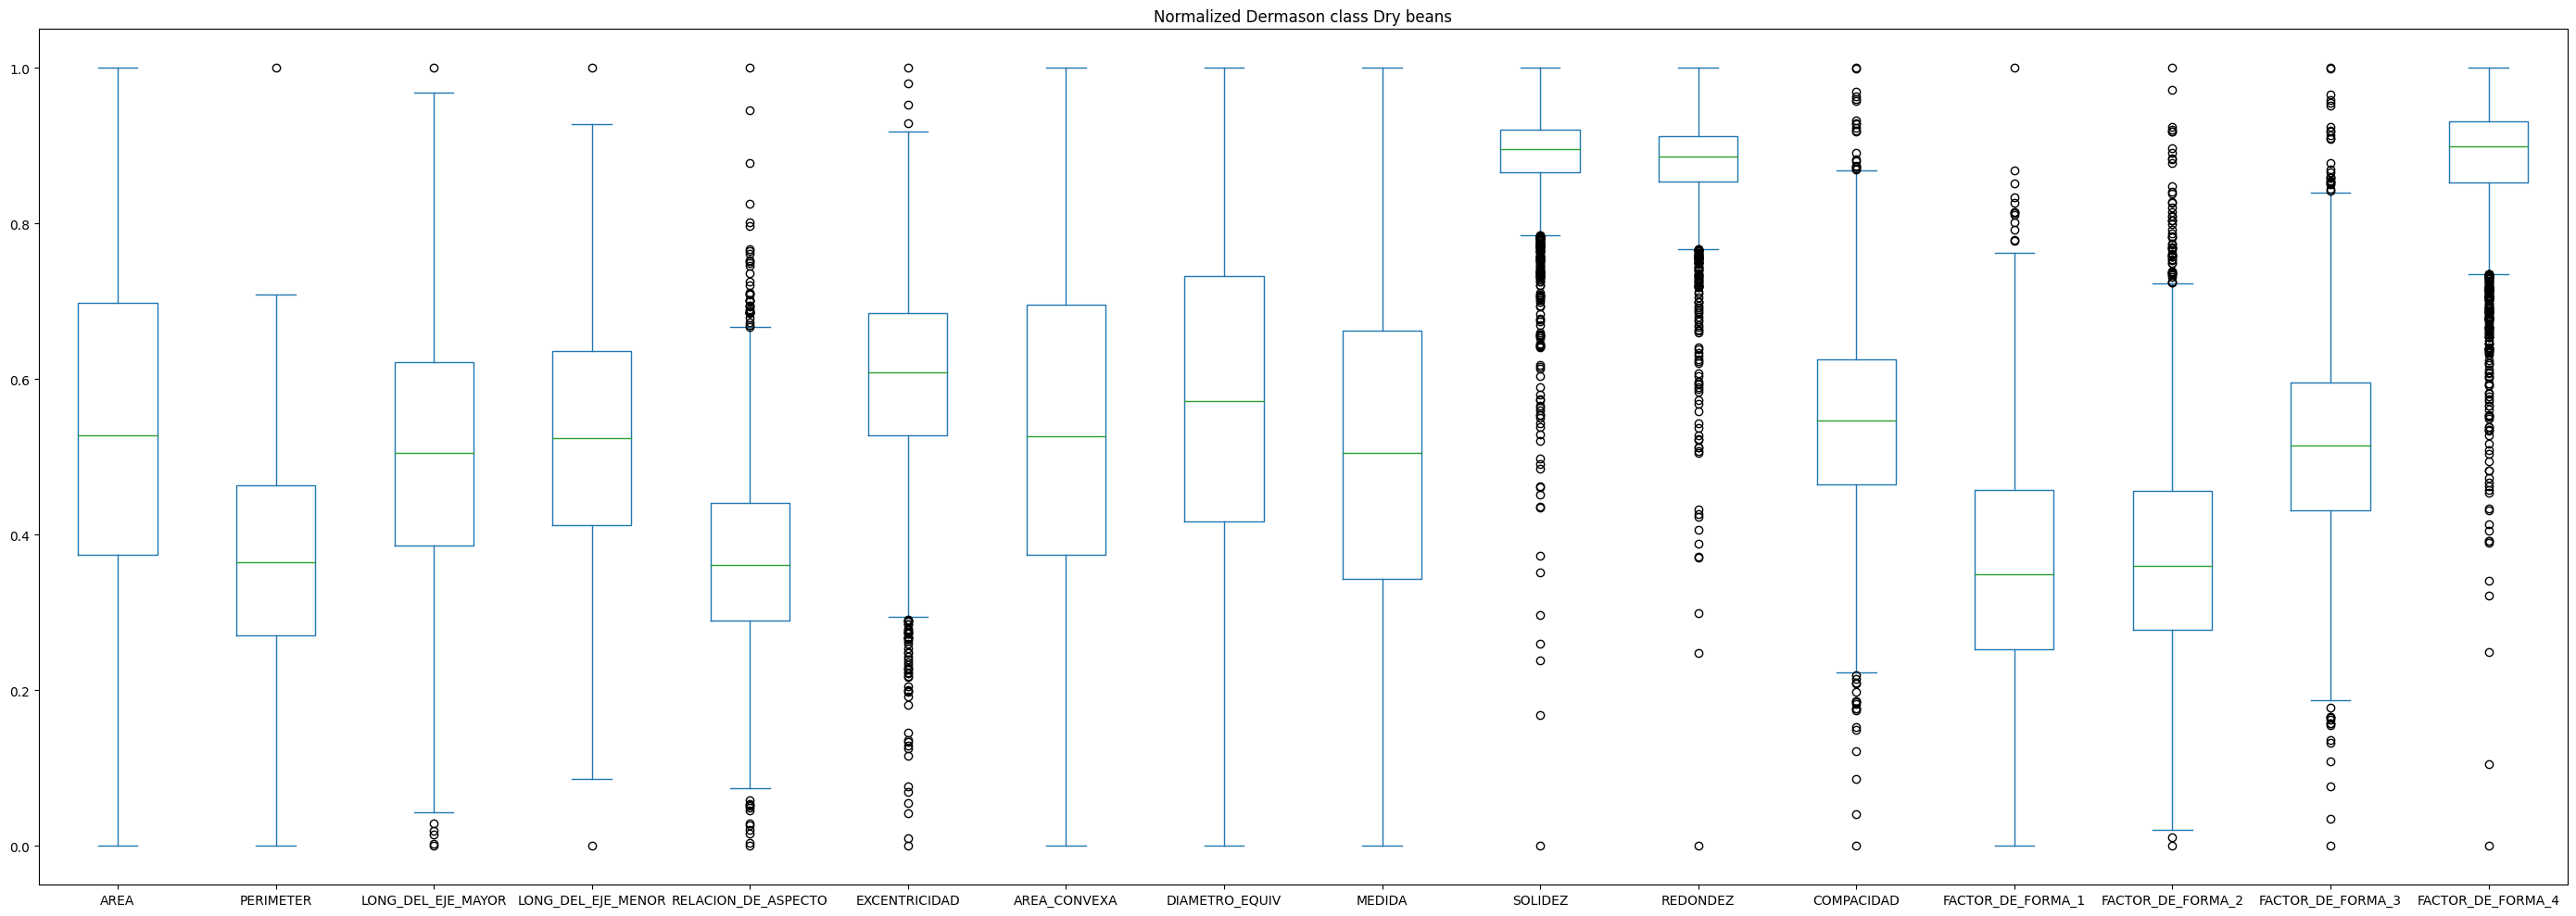

In [ ]:
dryBeans_DERMASON = dryBeans[dryBeans['CLASE'] == 'DERMASON']

dryBeans_DERMASON_norm = dryBeans_DERMASON.copy()
dryBeans_DERMASON_norm = dryBeans_DERMASON_norm[dryBeans_DERMASON_norm.columns[0:16]]
dryBeans_DERMASON_norm = (dryBeans_DERMASON_norm - dryBeans_DERMASON_norm.min()) / (dryBeans_DERMASON_norm.max() - dryBeans_DERMASON_norm.min())

# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_DERMASON_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='Normalized Dermason class Dry beans')

# Display the plot
plt.show()

### 2.2.6. HOROZ

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


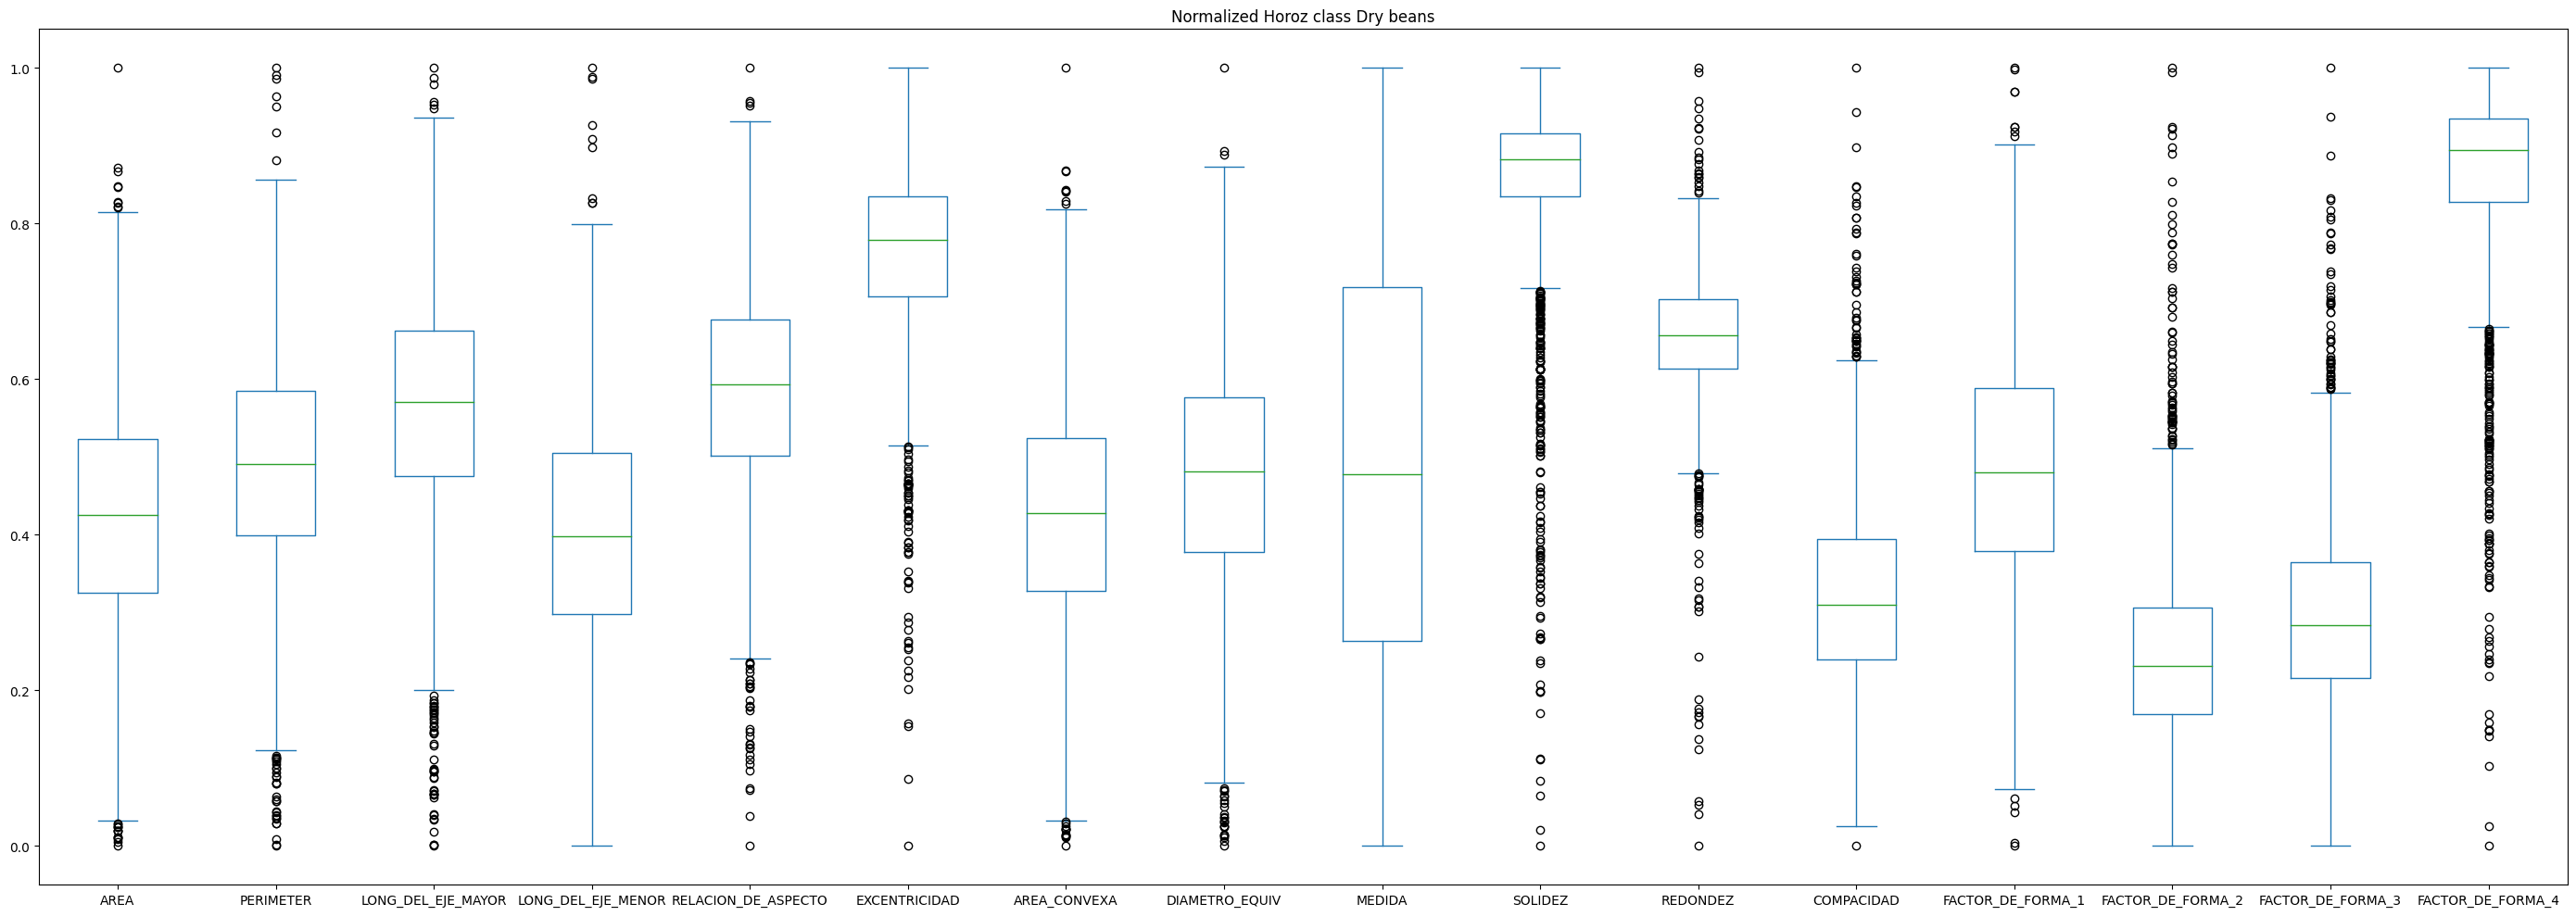

In [ ]:
dryBeans_HOROZ = dryBeans[dryBeans['CLASE'] == 'HOROZ']

dryBeans_HOROZ_norm = dryBeans_HOROZ.copy()
dryBeans_HOROZ_norm = dryBeans_HOROZ_norm[dryBeans_HOROZ_norm.columns[0:16]]
dryBeans_HOROZ_norm = (dryBeans_HOROZ_norm - dryBeans_HOROZ_norm.min()) / (dryBeans_HOROZ_norm.max() - dryBeans_HOROZ_norm.min())

# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_HOROZ_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='Normalized Horoz class Dry beans')

# Display the plot
plt.show()

### 2.2.7. SIRA

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


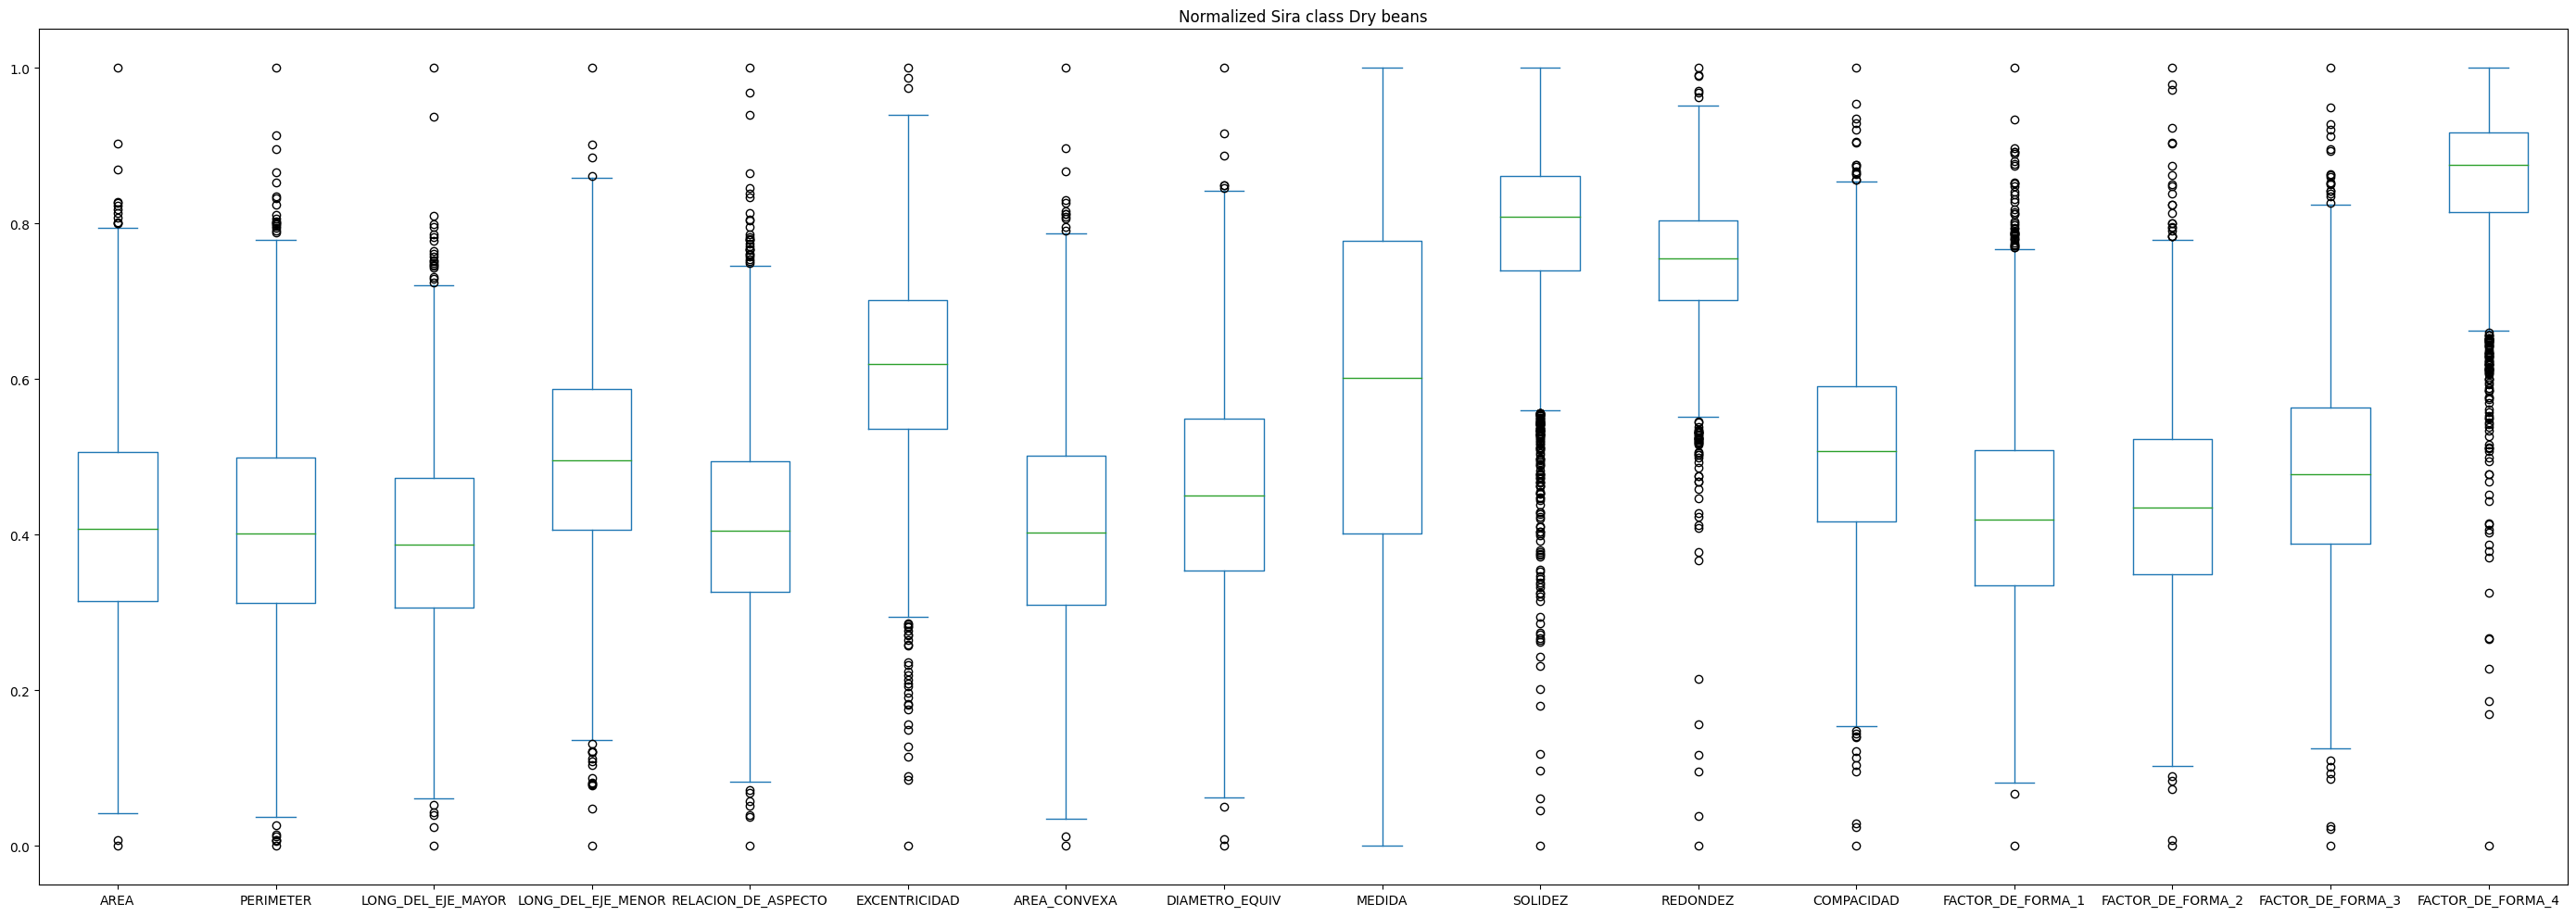

In [ ]:
dryBeans_SIRA = dryBeans[dryBeans['CLASE'] == 'SIRA']

dryBeans_SIRA_norm = dryBeans_SIRA.copy()
dryBeans_SIRA_norm = dryBeans_SIRA_norm[dryBeans_SIRA_norm.columns[0:16]]
dryBeans_SIRA_norm = (dryBeans_SIRA_norm - dryBeans_SIRA_norm.min()) / (dryBeans_SIRA_norm.max() - dryBeans_SIRA_norm.min())

# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_SIRA_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='Normalized Sira class Dry beans')

# Display the plot
plt.show()

# <center> 3. Pre-Procesamiento </center>

## 3.1. Normalización de la data

In [7]:
dryBeans_norm = dryBeans.copy()
dryBeans_norm = dryBeans_norm[dryBeans_norm.columns[0:16]]
dryBeans_norm = (dryBeans_norm - dryBeans_norm.min()) / (dryBeans_norm.max() - dryBeans_norm.min())
dryBeans_norm['CLASE'] = dryBeans['CLASE']

C:\Users\javie\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


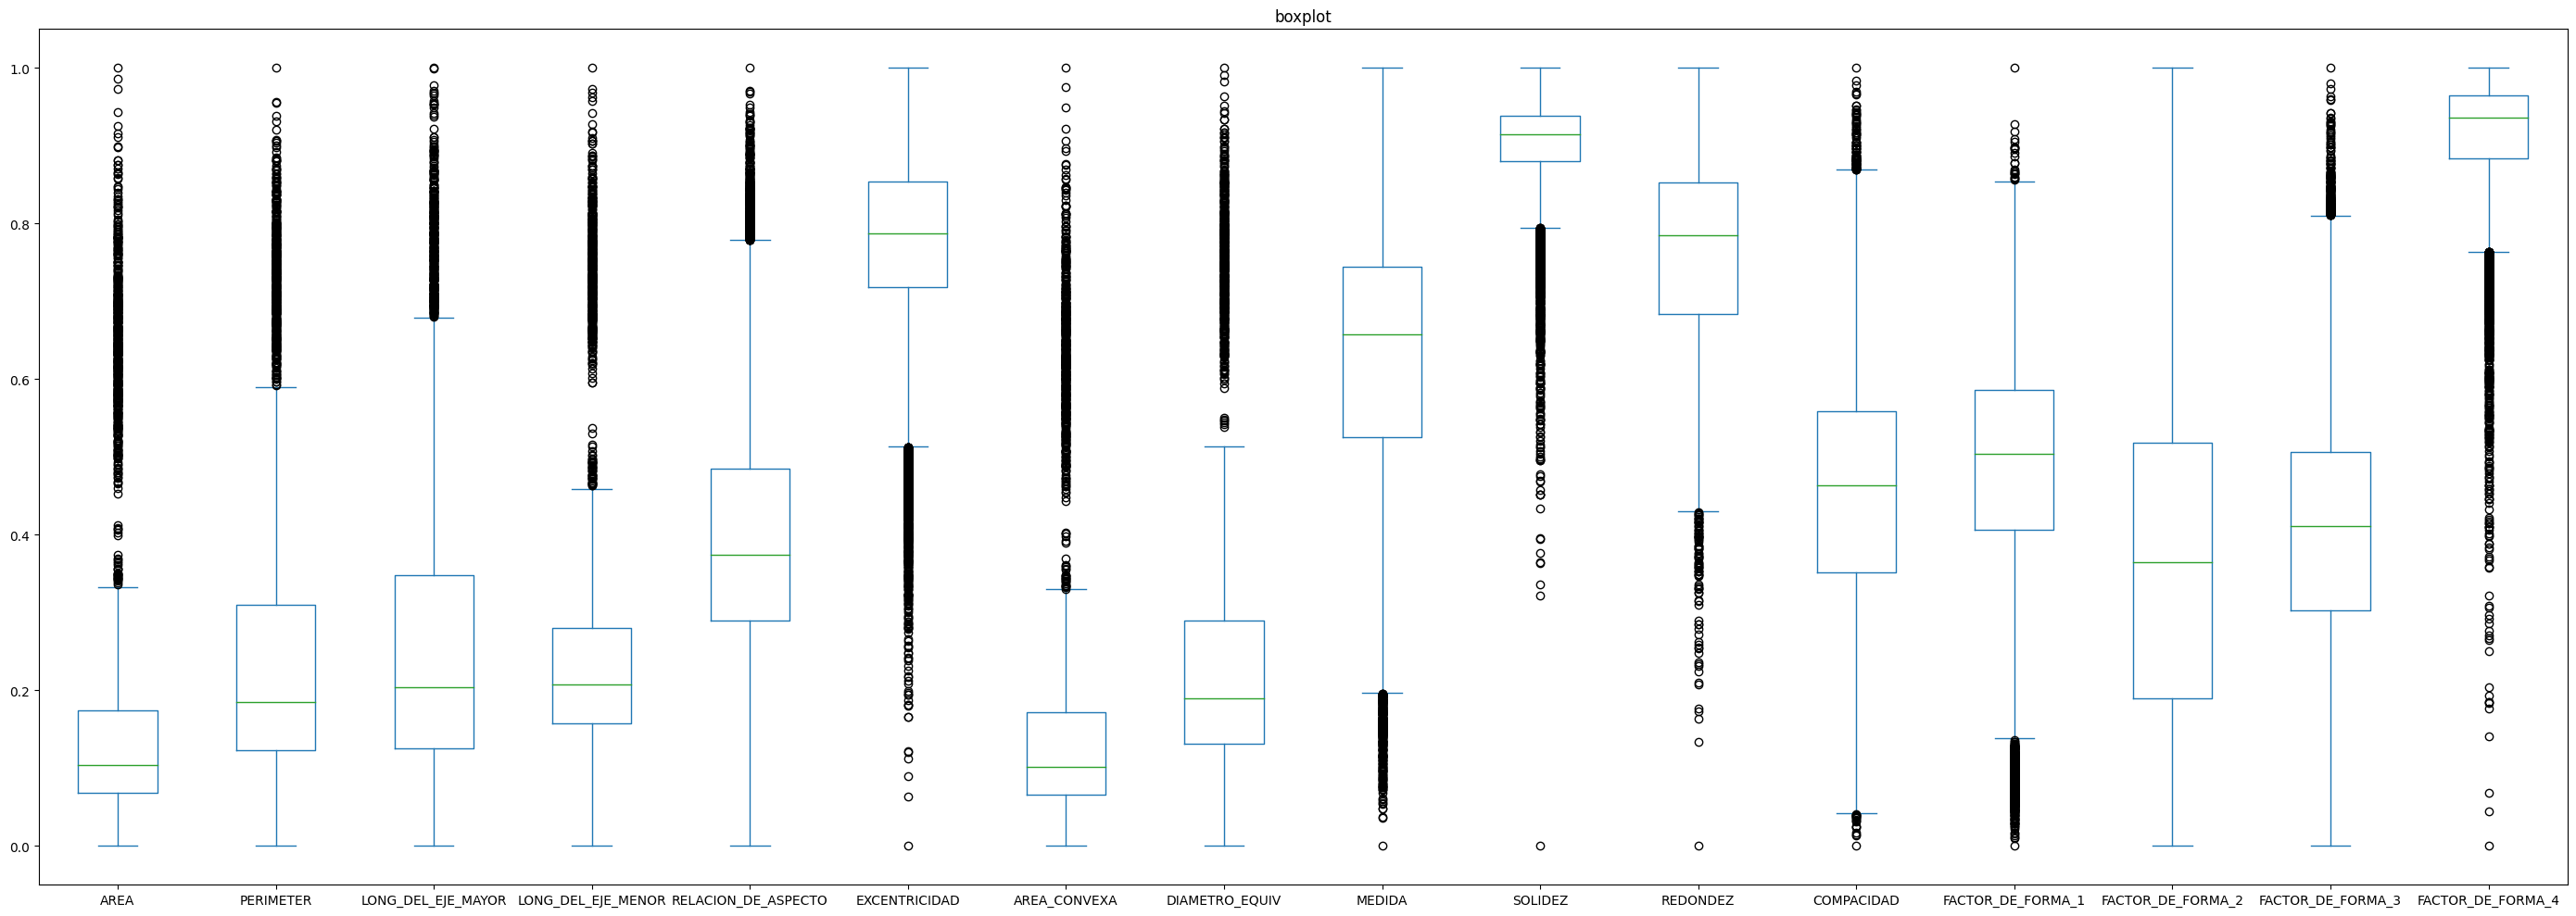

In [8]:
# Set the figure size
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["figure.autolayout"] = True

# Plot the dataframe
ax = dryBeans_norm[[
    "AREA"               ,"PERIMETER"        ,"LONG_DEL_EJE_MAYOR","LONG_DEL_EJE_MENOR",
    "RELACION_DE_ASPECTO","EXCENTRICIDAD"    ,"AREA_CONVEXA"      ,"DIAMETRO_EQUIV"    ,
    "MEDIDA"             ,"SOLIDEZ"          ,"REDONDEZ"          ,"COMPACIDAD"        ,
    "FACTOR_DE_FORMA_1"  ,"FACTOR_DE_FORMA_2","FACTOR_DE_FORMA_3" ,"FACTOR_DE_FORMA_4"
    ]].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

Hay un elemento en el boxplot de "SOLIDEZ" y "REDONDEZ" que es considerado como un outlier

## 3.2. Separación de la data en entrenamiento y testing

In [9]:
# 80% para entrenar los dryBeans_norm
dryBeans_train = dryBeans_norm.sample(frac = 0.8 , random_state=777)
# Los demás dryBeans_norm para el test, filtramos con el .drop()
dryBeans_test = dryBeans_norm.drop(dryBeans_train.index).sample(frac=1.0 , random_state=777)

## 3.3 Separamos nuestra muestras y definimos nuestra Y y X's

In [10]:
target = 'CLASE'

x_train = dryBeans_train.drop(columns=target)
y_train = dryBeans_train[target]

x_test = dryBeans_test.drop(columns=target)
y_test = dryBeans_test[target]

# <center> 4. SVM </center>

## 4.1. Importamos las librerías de Support Vector Machine

In [11]:
from sklearn import svm 

## 4.2. Definimos nuestro SVM con un SVC (Support Vector Clasification) usando un kernel Polinomial y un C = 0.1

In [12]:
modelo = svm.SVC(kernel="poly", gamma=0.5 , C = 0.1)
modelo.fit(x_train, y_train)

SVC(C=0.1, gamma=0.5, kernel='poly')

## 4.3. los puntajes de nuestro modelo

In [13]:
print(modelo.score(x_train,y_train))
print(modelo.score(x_test,y_test))


0.9224905868307466
0.917340191036003


## 4.4. Mostramos la matriz de confusión

C:\Users\javie\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


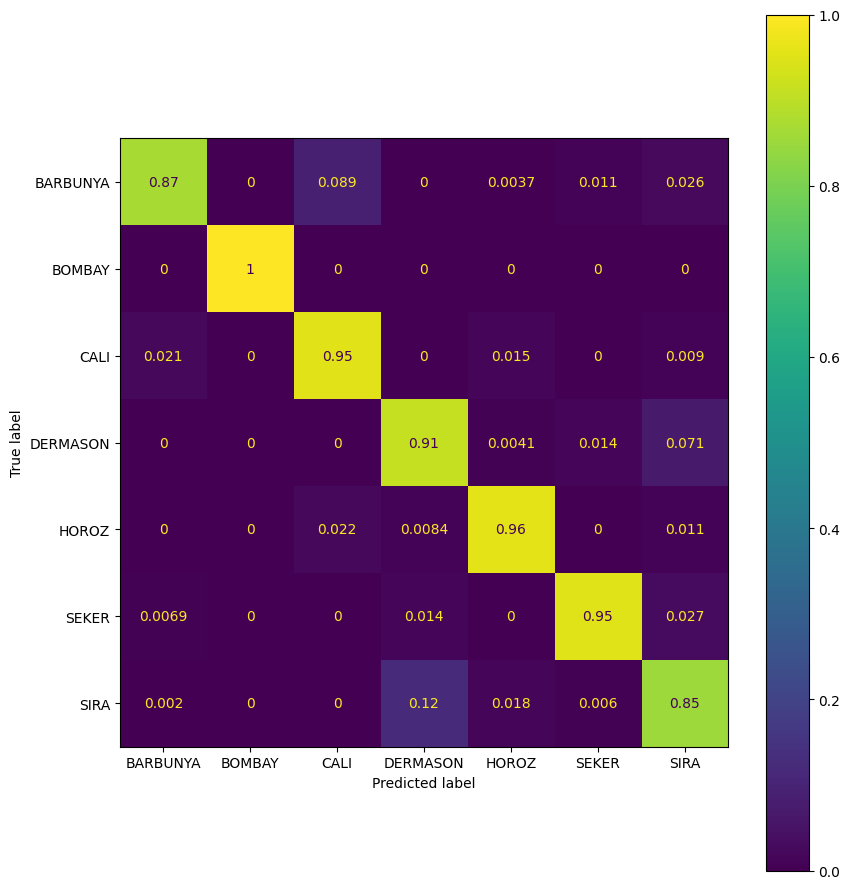

In [14]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred1 = modelo.predict(x_test)
fig, ax = plt.subplots(figsize=(9,9))
cmp=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1,normalize='true',ax=ax)

C:\Users\javie\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


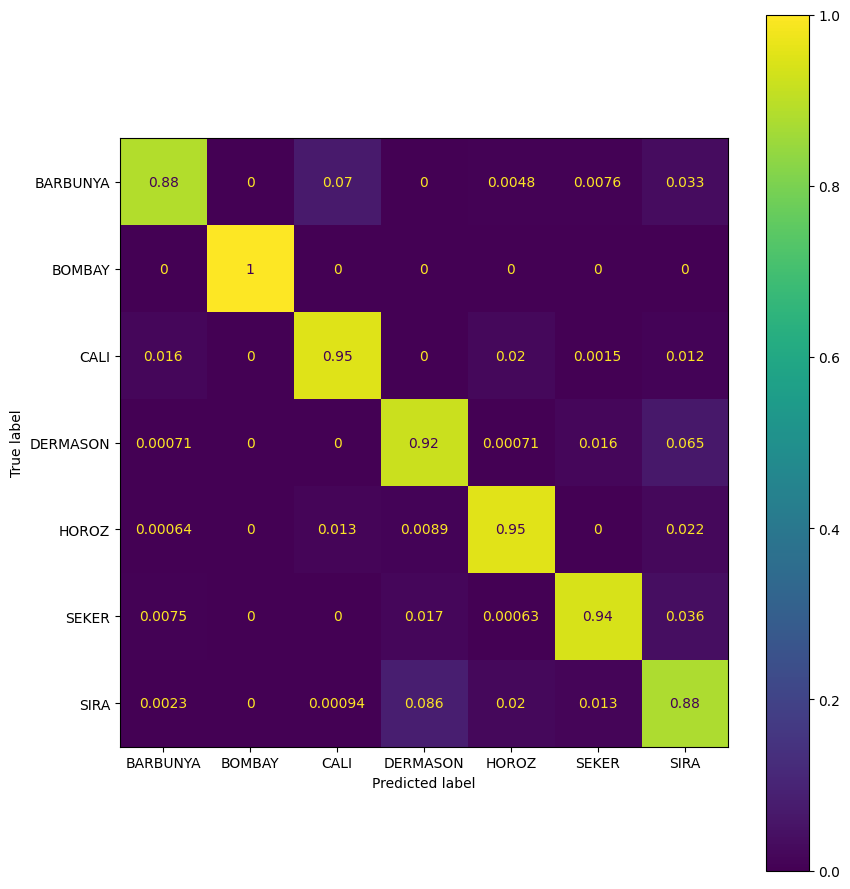

In [15]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred2 = modelo.predict(x_train)
fig, ax = plt.subplots(figsize=(9,9))
cmp=ConfusionMatrixDisplay.from_predictions(y_train,y_pred2,normalize='true',ax=ax)

## 4.5. Mostramos las metricas

In [16]:
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score, precision_score, recall_score
## Accuracy
print("Accuracy. Accuracy_score ->",accuracy_score(y_test,y_pred1))
print("Accuracy. Balanced_accuracy_score ->",balanced_accuracy_score(y_test,y_pred1))

print()
## Precision
print("Precision. macro ->",precision_score(y_test , y_pred1 , average= 'macro'))
print("Precision. weighted ->",precision_score(y_test , y_pred1 , average= 'weighted'))

print()
## Recall
print("Recall. macro ->",recall_score(y_test,y_pred1 ,  average = 'macro'))
print("Recall. weighted ->",recall_score(y_test,y_pred1 ,  average = 'weighted'))

print()
## F1 Score
print("F1 Score. macro ->",f1_score(y_test,y_pred1,  average= 'macro'))
print("F1 Score. weighted ->",f1_score(y_test,y_pred1,  average= 'weighted'))

print()
## Specify


Accuracy. Accuracy_score -> 0.917340191036003
Accuracy. Balanced_accuracy_score -> 0.9284796174719384

Precision. macro -> 0.9325327539410816
Precision. weighted -> 0.9179066258445744

Recall. macro -> 0.9284796174719384
Recall. weighted -> 0.917340191036003

F1 Score. macro -> 0.9301333719344592
F1 Score. weighted -> 0.9173450667807524



In [17]:
#Matriz de clasificación
from sklearn.metrics import classification_report
target_names = pd.unique(dryBeans['CLASE'])
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

       SEKER       0.96      0.87      0.91       271
    BARBUNYA       1.00      1.00      1.00        87
      BOMBAY       0.91      0.95      0.93       333
        CALI       0.91      0.91      0.91       737
       HOROZ       0.95      0.96      0.95       358
        SIRA       0.96      0.95      0.96       437
    DERMASON       0.84      0.85      0.85       499

    accuracy                           0.92      2722
   macro avg       0.93      0.93      0.93      2722
weighted avg       0.92      0.92      0.92      2722

